### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
df.head()

,Close,High,Low,Open,Volume,log_return,SMA_short,SMA_long,volatility
Date,,,,,,,,,
2017-02-19,1047.869995,1056.810059,1043.459961,1054.760010,77423296,-0.006231,1019.962299,955.824878,0.022941
2017-02-20,1079.979980,1080.489990,1041.689941,1048.689941,109478000,0.030183,1025.441147,957.457977,0.021000
2017-02-21,1115.300049,1117.250000,1076.930054,1079.280029,186868992,0.032181,1031.754999,959.328978,0.021647
2017-02-22,1117.439941,1125.390015,1100.550049,1114.800049,136100000,0.001917,1037.036996,960.800978,0.021297
2017-02-23,1166.719971,1176.619995,1116.959961,1117.270020,189454000,0.043156,1043.877493,961.040778,0.022804


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2873 entries, 2017-02-19 to 2024-12-31
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       2873 non-null   float64
 1   High        2873 non-null   float64
 2   Low         2873 non-null   float64
 3   Open        2873 non-null   float64
 4   Volume      2873 non-null   int64  
 5   log_return  2873 non-null   float64
 6   SMA_short   2873 non-null   float64
 7   SMA_long    2873 non-null   float64
 8   volatility  2873 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 224.5 KB


In [4]:
df.isnull().sum()

Close         0
High          0
Low           0
Open          0
Volume        0
log_return    0
SMA_short     0
SMA_long      0
volatility    0
dtype: int64

### Feature engineering

In [5]:
df.asfreq("B")
df = df.ffill()

In [6]:
df.isnull().sum()

Close         0
High          0
Low           0
Open          0
Volume        0
log_return    0
SMA_short     0
SMA_long      0
volatility    0
dtype: int64

In [7]:
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df["SMA_short"] = df["Close"].rolling(window=20).mean()
df["SMA_long"] = df["Close"].rolling(window=50).mean()
df["volatility"] = df["log_return"].rolling(window=20).std()
df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_low_range"] = (df["High"] - df["Low"]) / df["Close"]
df["volume_zscore"] = (df["Volume"] - df["Volume"].rolling(20).mean()) / df[
    "Volume"
].rolling(20).std()

In [8]:
df.isnull().sum()

Close                0
High                 0
Low                  0
Open                 0
Volume               0
log_return           1
SMA_short           19
SMA_long            49
volatility          20
open_close_ratio     0
high_low_range       0
volume_zscore       19
dtype: int64

In [9]:
df.dropna(inplace=True)

### Visualization

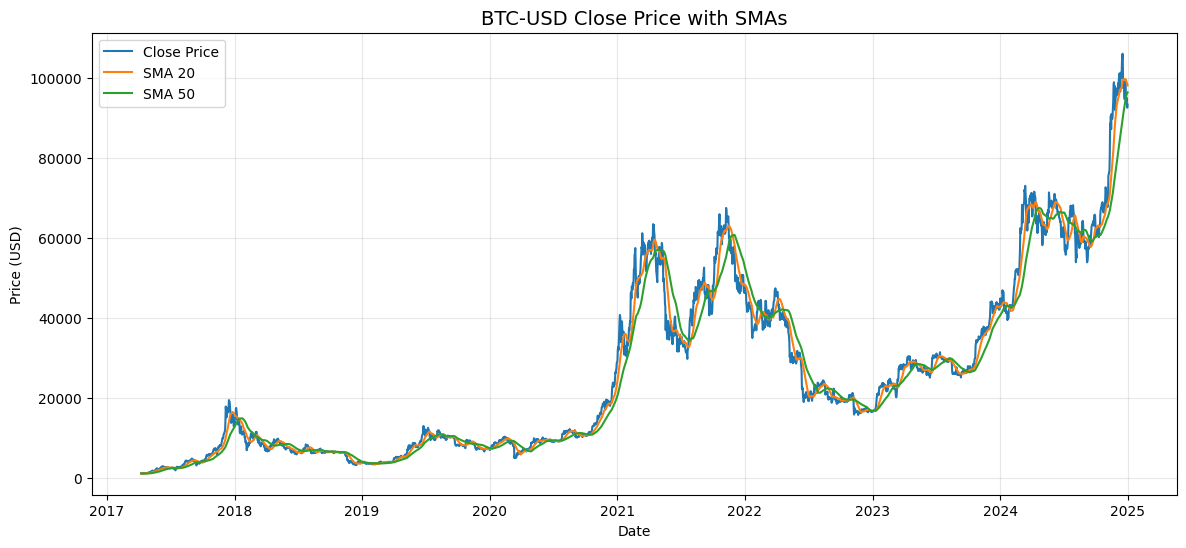

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", linewidth=1.5)
plt.plot(df.index, df["SMA_short"], label=f"SMA 20")
plt.plot(df.index, df["SMA_long"], label=f"SMA 50")
plt.title("BTC-USD Close Price with SMAs", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

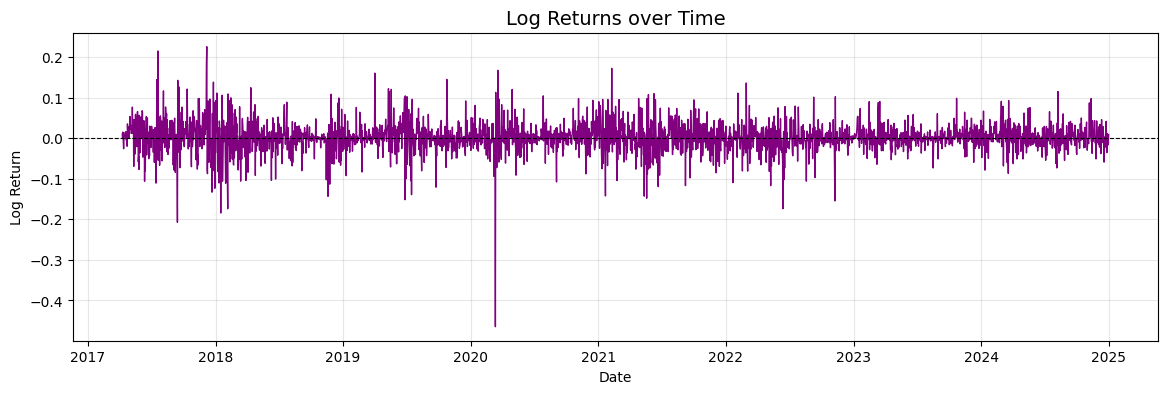

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["log_return"], color="purple", linewidth=1)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Log Returns over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

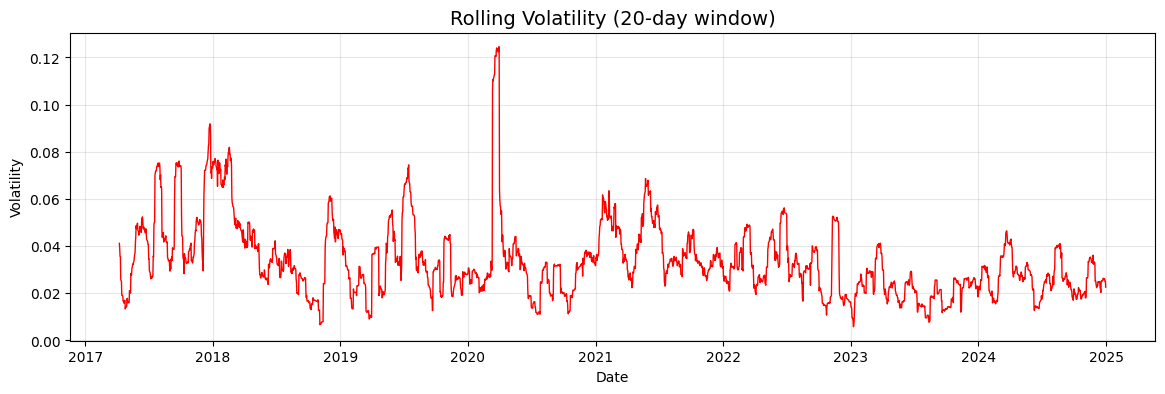

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["volatility"], color="red", linewidth=1)
plt.title(f"Rolling Volatility (20-day window)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

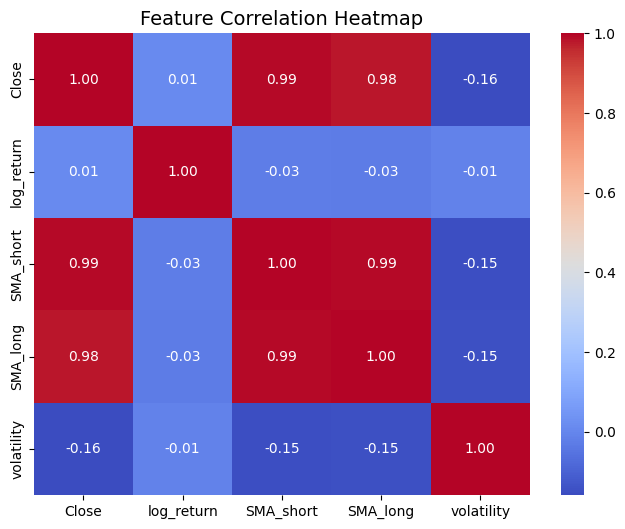

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["Close", "log_return", "SMA_short", "SMA_long", "volatility"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [14]:
df.to_csv("data.csv", index=True)